In [6]:
from simulation import Simulation
import pandas

In [7]:
class ExampleModel():
    inputs = ['value_in']
    outputs = ['value_out']
    delta_t = 60 # s

    def __init__(self, name):
        self.name = name
        # init parameters here

    def step(self, time, value_in) -> dict:
        # model logic here
        value_out = value_in + 1
        return {'value_out': value_out}

In [8]:
sim = Simulation(output_to_file=True)

model1   = ExampleModel('example_1')
model2   = ExampleModel('example_2')

sim.add_model(model1, watch_values=['value_in'])
sim.add_model(model2, watch_values=['value_out'])

sim.connect(model1, model2, ('value_out', 'value_in'))
sim.connect(model2, model1, ('value_out', 'value_in'), time_shifted=True, init_values={'value_out': 1})

times = pandas.date_range('2021-01-01 00:00:00', '2021-01-03 00:00:00', freq='1min', tz='UTC+01:00')

sim.run(times)

Progress: 100%|██████████| 2881/2881 [00:02<00:00, 995.60Steps/s] 


In [9]:
sim.df

model,example_1,example_2
i/o,inputs,outputs
attribute,value_in,value_out
2021-01-01 00:00:00+01:00,1,3
2021-01-01 00:01:00+01:00,3,5
2021-01-01 00:02:00+01:00,5,7
2021-01-01 00:03:00+01:00,7,9
2021-01-01 00:04:00+01:00,9,11
...,...,...
2021-01-02 23:56:00+01:00,5753,5755
2021-01-02 23:57:00+01:00,5755,5757


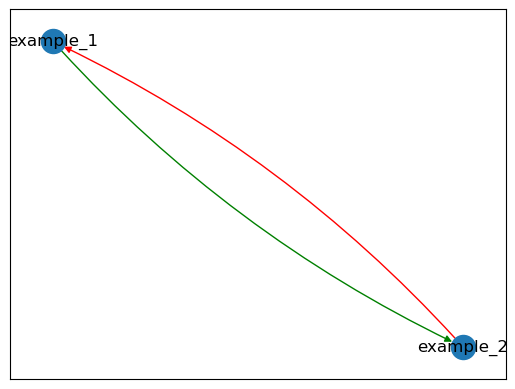

In [11]:
sim.draw_exec_graph()